### Формирование сигнала на борту NOAA

Как вы можете помнить, длина строки в формате APT составляет 2080 пикселей (909 пикселей для каждого изображения). Одна строка APT состоит из одной строки для видео канала A, за которой следует одна строка для видео канала Б, где канал A - видимый, а Б - ИК. В процессе формирования сигналов APT система вставляет информацию о калибровке и телеметрии, что приводит к образованию изображения, показанного ниже.

<img src="https://noaa-apt.mbernardi.com.ar/examples/argentina.png" alt="" style="width: 600px;"/>

Рассмотрим, как формируется одна строка изображения в формате APT. 

Для видимой и инфракрасной части генерация сигналов идентична: в основе лежат 909 пикселей основного изображения, потом к ним добавляются данные телеметрии, а уже после добавляется синхроимпульс.

| | | Канал А | | | | | | Канал Б | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|| Синхроимпульс | Телеметрия | Данные | Телеметрия | | | Синхроимпульс | Телеметрия | Данные | Телеметрия ||

Синхроимпульс – это уникальная последовательность данных, которая не должна встречаться нигде в области данных и служит для определения начала каждой строки, то есть позволяет принимающему программному обеспечению выровнять получаемые данные. 

Кроме того, в получаемых данных есть минутные метки, которые представляют собой четыре строки, чередующиеся черными и белыми линиями, которые повторяются каждые 60 секунд (120 строк). Канал Б всегда является ИК-каналом, поэтому пробелы белые, а маркеры черные. Когда канал А является видимым, пробелы черные, а минутные маркеры белые.

*В дневное время формат APT показывает видимые данные и данные ИК. Ночью спутник может вставить данные из другого ИК-канала, чтобы заменить видимый канал, поскольку данные видимого канала будут отображаться чёрными.*

Телеметрия — это блоки с информацией о переменных, которые необходимы для калибровки снимка и вычисления информации о температуре подстилающей поверхности Земли.

<img src="https://sourceforge.isae.fr/attachments/download/2371/APTexample.png" alt="" style="width: 600px;"/>

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_frame.png" alt="" style="width: 600px;"/>

Изучив формат кадра, показанный на рисунке выше, можно увидеть, что оба канала A и B имеют серию из 16 блоков, называемых «клиньями», используемых при калибровке изображения APT. Каждый из таких клиньев состоит из 8 последовательных строк. Таким образом, раздел телеметрии состоит из шестнадцати клиньев по 8 повторяющихся строк каждый, которые используются в качестве эталонных значений для декодирования каналов изображения.

*Первые восемь клиньев начинаются с 1/8 максимальной интенсивности и последовательно увеличиваются на 1/8 до полной интенсивности в восьмом сегменте, причем девятый имеет нулевую интенсивность. Каждый из клиньев с десятого по пятнадцатый кодирует данные о калибровке датчика. Между каналами А и Б различаются только клинья 15 (значение "заднего сканирования", когда один из ИК-радиометров "смотрит" на излучатель черного тела) и 16 (идентификатор канала).*

Шестнадцать блоков телеметрии повторяются каждые 128 строк, и эти 128 строк называются кадром.

| Имя         | Длина          | Описание |
| :--         | :--            | :--      |
| Sync A      | 39             | Биты 000011001100110011001100110011000000000 |
| Space A     | 47             | |
| Image A     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry A | 45             | |
| Sync B      | 39             | Биты 000011100111001110011100111001110011100 |
| Space B     | 47             | |
| Image B     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry B | 45             | |
| **Total**   | **2080 / 0.5 сек** | |

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_line_format.png" alt="" style="width: 600px;"/>

Особенностью спутниковой связи является необходимость работы в условиях сравнительно малого отношения сигнал/шум, вызванного значительной удалённостью приёмника от передатчика и ограниченной мощностью спутника. Для передачи цифровых данных по спутниковому каналу связи они должны быть сначала преобразованы в радиосигнал, занимающий определённый частотный диапазон. Для этого применяется модуляция.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Amfm3.gif" alt="" style="width: 400px;"/>

**Зачем нужна модуляция?** При передаче информации на малые расстояния часто используются низкочастотные колебания, передача которых на расстояние свыше нескольких метров крайне затруднительна, в силу их быстрого ослабевания. Но при необходимости передачи сигналов на бОльшие расстояния на помощь приходит модуляция.

**В чем суть модуляции?** Возьмем высокочастотное колебание. Само по себе оно не несет никакой информации. Его мы будем использовать в качестве основного компонента передаваемого сигнала. Частоту этого колебания называют несущей. Для того, чтобы начать передавать полезную информацию, нам нужно каким-нибудь образом видоизменить несущую частоту так, чтобы она повторяла закономерности сигнала, который мы хотим передать. Иными словами, нам нужно сделать так, чтобы она несла информацию о нашем полезном сигнале. Это самое видоизменение называется модуляцией. Модуляция осуществляется с помощью модулятора со стороны отправителя, а с помощью демодулятора на стороне получателя высокочастотный сигнал преобразуется обратно в низкочастотный. Они собраны в одно устройство под названием модем, которое получилось благодаря слиянию слов МОдулятор и ДЕМодулятор.

<img src="http://neerc.ifmo.ru/wiki/images/5/57/Analog_modulation.png" alt="" style="width: 500px;"/>

В системе, используемой NOAA-19, используется амплитудная и частотная модуляции. 

*Сначала данные модулируются по амплитуде с помощью поднесущей 2,4 кГц, что приводит к формированию аналогового сигнала с полосой пропускания 34 кГц. Сделано это для уменьшения влияния помех при генерации сигнала на борту спутника NOAA-19. Перед непосредственной передачей на землю сигнал дополнительно модулируется по частоте 136-138 МГц (в зависимости от спутника), чтобы на этой частоте сигнал не сильно затухал, проходя через толщу атмосферы..*

Частотная демодуляция производится приемником сигнала, так что разберемся с амплитудной.

Рассмотрим простой пример. Допустим, что мы используем любой из видов цифровой передачи информации, для обозначения логической единицы мы передаём сигнал, а для логического нуля молчим. 

Populating the interactive namespace from numpy and matplotlib


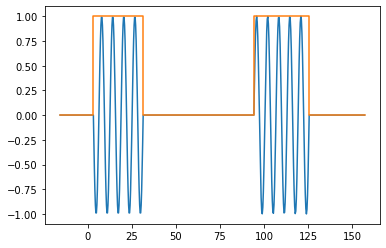

In [2]:
%pylab inline

x = np.array([-5 * pi])
x = np.append(x, np.linspace(pi, 10 * pi, 100))
x = np.append(x, np.linspace(30 * pi, 40 * pi, 100))
x = np.append(x, [50 * pi])

y = [-5 * pi, pi, pi, 10 * pi, 10 * pi, 30 * pi, 30 * pi, 40 * pi, 40 * pi, 50 * pi]

plot(x, np.sin(x))
plot(y, [0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

Важно отметить что синяя гармоническая частота может быть любая, но должна доходить до получателя сигнала без существенного затухания. 

Для демодуляции сигнала, который вы отобразили на прошлом занятии, можно использовать преобразование Гильберта.

**Практическая работа**

1. Выполните преобразование Гильберта для набора данных, полученного на прошлом занятии (в результате получите аналитический сигнал), используя функцию `hilbert` из пакета `scipy`.
2. Вычислите и отобразите огибающую амплитуды (amplitude envelope) получившегося аналитического сигнала.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#FOLDERPATH = '/content/drive/My Drive/signal.wav'

In [4]:
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np

sample_rate, data = wavfile.read('signal.wav')
data = np.array(data, dtype=float)
n_data = (data - 128) / 128

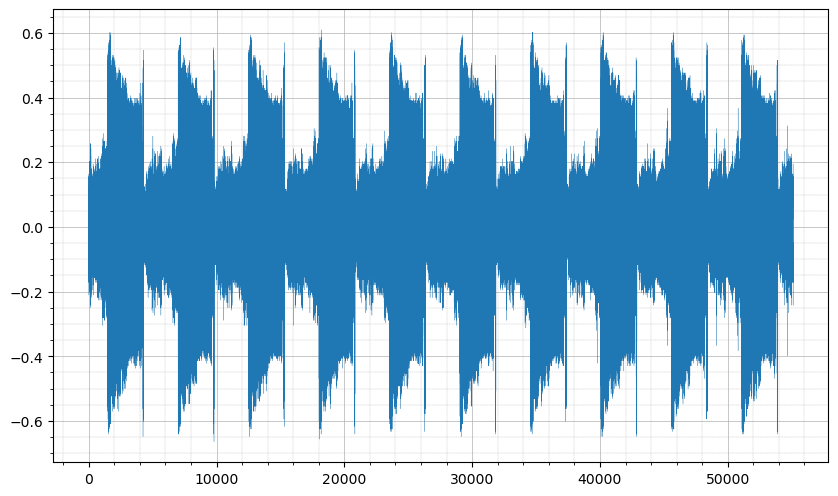

In [5]:
start, finish = 300, 305
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(n_data[start * sample_rate : finish * sample_rate], linewidth=0.2)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

In [6]:
analytic_signal = hilbert(n_data)
amplitude_envelope = np.abs(analytic_signal)
print(amplitude_envelope[1000:1500])

[0.18591149 0.22441194 0.26457841 0.2448557  0.19962357 0.18771477
 0.23096246 0.28520224 0.29203975 0.2500005  0.18619164 0.13656293
 0.11158666 0.10204615 0.15111712 0.20013206 0.22694531 0.26140091
 0.26004556 0.20294455 0.12403796 0.09931421 0.19232839 0.23479942
 0.16393961 0.11557267 0.20735552 0.28759638 0.27811874 0.1591605
 0.0879268  0.15711011 0.2371305  0.27431625 0.28907183 0.29555599
 0.25064824 0.19056944 0.16969499 0.18060638 0.19185419 0.20312714
 0.23693276 0.28412219 0.28576795 0.21460539 0.12500983 0.09362103
 0.10163531 0.1116092  0.14113413 0.25328832 0.28649164 0.22225772
 0.19601909 0.22727577 0.2981835  0.30740152 0.18455654 0.10012139
 0.14108974 0.24859015 0.28601691 0.21159704 0.14642833 0.12438943
 0.2343887  0.31246888 0.38056435 0.34833603 0.25398392 0.26781997
 0.32232188 0.35308302 0.26832051 0.16881577 0.2122142  0.29802987
 0.32161574 0.20430881 0.13865461 0.28845963 0.34621731 0.30932355
 0.14523917 0.21184243 0.23094189 0.15986405 0.32316619 0.25355

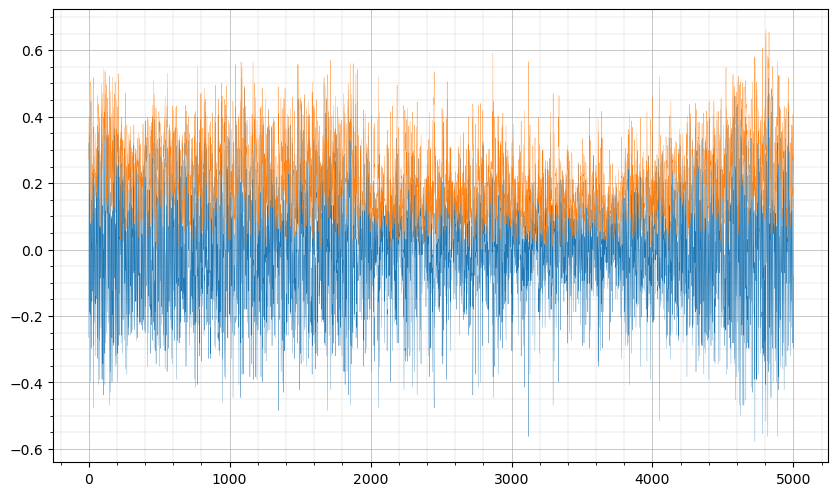

In [7]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(n_data[300000 : 305000], linewidth=0.2)
ax.plot(amplitude_envelope[300000 : 305000], linewidth=0.2)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

Рассмотрим цифровую запись аналогового сигнала.

Чтобы записать непрерывный сигнал в цифровой формат, нужно сначала определить частоту записи, то есть количество значений в секунду. Это значение называется частотой дискретизации (частота взятия отсчётов непрерывного по времени сигнала при его дискретизации).

Теперь рассмотрим один период синусоиды. Какого минимального количества произвольных точек будет достаточно для однозначного определения её амплитуды и частоты?

Согласно [теореме Котельникова](https://ru.wikipedia.org/wiki/Теорема_Котельникова), нам нужно взять более двух точек на один период (чтобы однозначно восстановить исходный сигнал, частота дискретизации должна более чем в два раза превышать наибольшую частоту в спектре сигнала). Тогда, используя [дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье), мы сможем выделить исходный сигнал. 

Погружаться в данные преобразования и теоремы мы не станем, так как наш сигнал заведомо можно расшифровать, и делать мы это будем, используя библиотеки Python. Подробнее с этими понятиями вы познакомитесь на старших курсах.

Вы уже знаете, что в нашем аудиофайле за одну секунду передаётся 11025 значений, и что на изображении в формате APT это 2 строки. Значит наш исходный сигнал нужно преобразовать в матрицу шириной 5512 (11025/2) элементов. И полученную матрицу преобразовать и изображение.

**Практическая работа**

1. Преобразуйте полученную в прошлом задании огибающую амплитуды в матрицу шириной 5512 элементов.
2. Получите и отобразите из получившейся матрицы изображение.

In [8]:
# Ваш код
print(len(amplitude_envelope))
matrix = np.array(amplitude_envelope[:1288*5512]).reshape(int(len(amplitude_envelope) / 5512), 5512)
np.append(matrix, amplitude_envelope[1288*5512:])
print(len(amplitude_envelope[1288*5512:]))
print(matrix)

7099649
193
[[0.29305759 0.33056235 0.22469935 ... 0.20920156 0.02344496 0.205535  ]
 [0.22289964 0.15809877 0.04219799 ... 0.45602507 0.50076781 0.38261544]
 [0.3194367  0.29916721 0.2411873  ... 0.20030012 0.12591697 0.20397205]
 ...
 [0.10438959 0.1601025  0.19816884 ... 0.27229757 0.44169239 0.3706933 ]
 [0.28238025 0.19552994 0.11088914 ... 0.21454413 0.21352367 0.226703  ]
 [0.17316807 0.04507895 0.04114687 ... 0.03487186 0.15350261 0.22395575]]


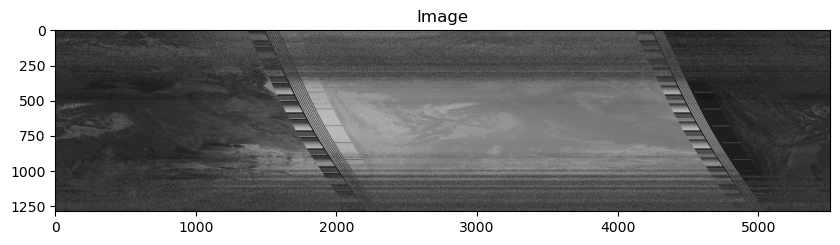

In [9]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [10]:
from scipy import signal
resampled_signal = signal.resample(amplitude_envelope, int(4160*(len(amplitude_envelope))/sample_rate))
resampled_signal /= resampled_signal.max()
print(len(resampled_signal))

2678869


39


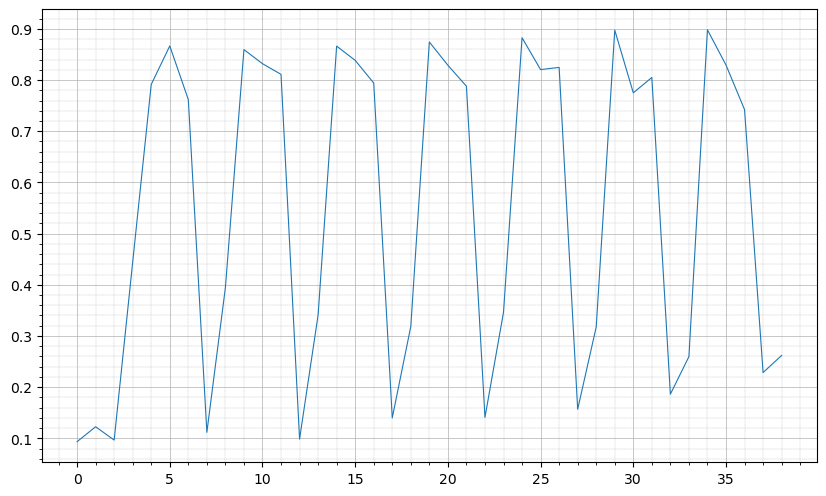

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
mas = resampled_signal[1300000 + 6200 + 500 + 70 + 25 + 0 : 1310000 - 2200 - 700 - 250 - 15 - 1]
print(len(mas))
ax.plot(mas, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

0
[[ 0.41723118  0.24960614  0.1936996  ...  0.21237892  0.18874958
   0.21870603]
 [ 0.23370899  0.08629787  0.13418148 ...  0.27125332  0.32988331
   0.64781728]
 [ 0.36778376  0.22962666  0.18524067 ...  0.31745644  0.22032181
   0.28725481]
 ...
 [-0.02583146  0.42891742  0.25532895 ...  0.3315714   0.29471401
   0.17253425]
 [ 0.12513689  0.31520367  0.32487399 ...  0.27084232  0.29856585
   0.27024139]
 [ 0.21316588  0.06492895  0.12803092 ...  0.13306076  0.38225549
   0.15667913]]


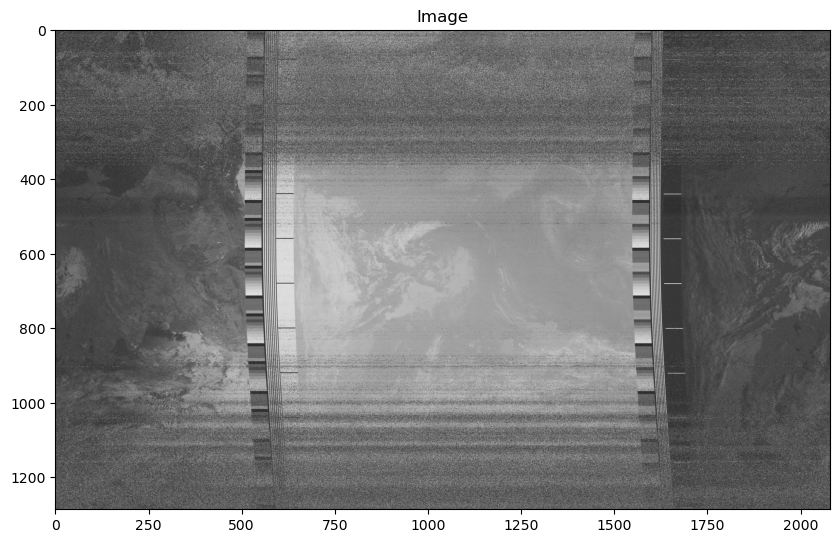

In [12]:
matrix = np.array(resampled_signal[:2080*1287]).reshape(int(len(resampled_signal) / 2080), 2080)
np.append(matrix, resampled_signal[1288*2080:])
print(len(resampled_signal[1288*2080:]))
print(matrix)

fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [13]:
indexes = []
i = 0
ind = 0
while i < len(matrix):
    minind = []
    for ind in range(1040):
        part = matrix[i][ind : ind + len(mas)]
        minind.append(abs((part - mas).mean()))
    indexes.append(np.array(minind).argmin())
    i += 1
    print(i)
        
indexes = np.array(indexes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


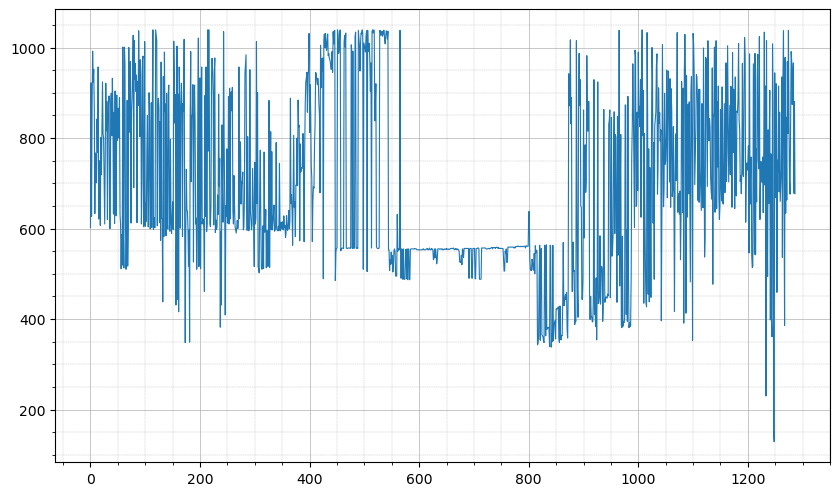

In [14]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(indexes, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

In [15]:
matrix1 = np.copy(matrix)

In [16]:
indexmin = int(indexes[600:750].mean()) + 10
for i in range(len(matrix1)):
    print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
matrix1 = np.array(matrix1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

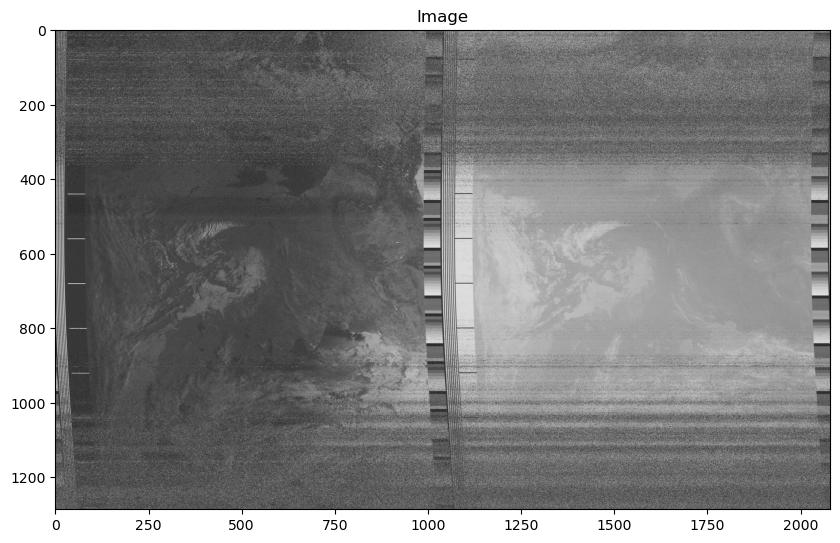

In [17]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix1[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [18]:
matrix1 *= 255

In [19]:
temperature_lines = matrix1[600:800, 2080 - 45:]

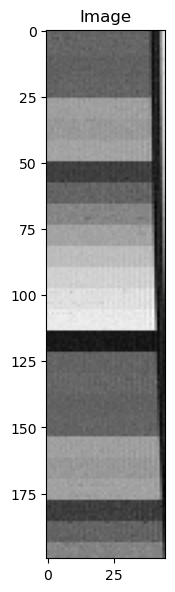

In [20]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(temperature_lines, cmap='gray')
plt.title('Image')
plt.show()

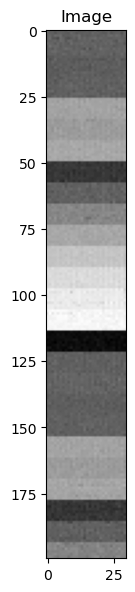

In [21]:
temperature_lines = temperature_lines[:, :30]
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(temperature_lines, cmap='gray')
plt.title('Image')
plt.show()

In [22]:
#print(temperature_lines)
index_black = []
for i in range(0, len(temperature_lines), 1):
    if temperature_lines[i].mean() < 0.1 * 255:
        index_black.append(i)
    print(temperature_lines[i].mean())
index_black = np.array(index_black)
print(index_black)


92.79038415217524
91.65992794339412
95.40830635431975
93.45378643211785
94.55071902863888
95.40133307403681
94.49245050386003
94.98743984014965
95.5054191057957
95.03134871652597
91.97022207919355
88.6072823644892
91.34918643696932
91.20074917972028
90.82527951129133
89.83337968003386
91.93228318816656
91.307066310346
93.09705506238325
93.71175600388868
92.8193040105814
95.3766077923398
93.44479621420675
93.94570688698333
93.08514056888882
92.69406821322742
147.28607592022817
148.34032437214617
150.08615326968032
148.330268619023
148.7283095879323
148.71912210223385
148.25039553550403
148.30606213523959
141.31431380295143
143.06325610325152
143.0438730504024
142.6240472967979
143.0954062001901
143.12505687953654
142.67569730940315
143.766446923141
151.58472408446576
153.20455448904627
151.9292500778919
152.4783897536511
152.79592823006897
153.7143227189579
151.78836311706402
153.05585939791354
59.277363927017376
58.86566360528092
61.07270639378564
58.18708443892656
58.364187678069
59.9

In [23]:
temperatures = []
for i in range(122, 171 - 8, 8):
    tmp = []
    for j in range(i, i + 8):
        tmp.append(temperature_lines[j].mean())
    print(tmp)
    temperatures.append(np.array(tmp).mean())
print()
print(temperatures)

[92.54974790883493, 93.11203065072029, 93.46591654999574, 92.98267671771701, 93.68802116336902, 92.67556152627638, 93.87125347803823, 92.67597967411547]
[96.59745737180512, 96.49825626637632, 97.25093224442728, 95.78088352415882, 95.43180227319657, 96.38869066579288, 96.56005265026496, 95.28748355068413]
[91.63359332701572, 92.2907335891161, 91.16279820155674, 91.5666418750408, 90.44524246597737, 91.31662700684075, 92.41485980023688, 92.48045999779912]
[93.74364824687873, 94.64565200462536, 93.45226769459595, 94.34199997157648, 93.584856198982, 93.79203346419862, 92.91409677022567, 93.20955735777011]
[149.04444899475843, 148.96795636704522, 148.69361460210837, 147.95680062068413, 149.58704116165976, 147.75421036394437, 148.9921071619927, 149.8127052764926]
[142.15535977926956, 142.02607072472094, 142.59346916690887, 141.53121201559088, 143.32971904216762, 143.0863746238585, 143.1649636860296, 142.21959988167575]

[93.12764845863339, 96.22444481833827, 91.66386953294793, 93.710513963606

In [24]:
C_T1, C_T2, C_T3, C_T4, C_BB, C_S = temperatures

In [25]:
T_PRT1 = 276.6067 + 0.051111*C_T1 + 1.405783*0.000001*(C_T1**2)
T_PRT2 = 276.6119 + 0.051090*C_T2 + 1.496037*0.000001*(C_T2**2)
T_PRT3 = 276.6311 + 0.051033*C_T3 + 1.496990*0.000001*(C_T3**2)
T_PRT4 = 276.6268 + 0.051058*C_T4 + 1.493110*0.000001*(C_T4**2)

In [26]:
T_BB = (T_PRT1 + T_PRT2 + T_PRT3 + T_PRT4) / 4
Tst_BB = 1.67396 + T_BB * 0.997364
print(Tst_BB)

282.34883110015056


In [27]:
N_BB = (1.1910427 * (10**(-5)) * (2670**3)) / (np.exp((1.4387752 * 2670) / Tst_BB) - 1)
print(N_BB)

0.2796518420621249


In [28]:
def NE(CE, NBB, CBB, CS):
    N_E = np.abs(NBB * (CS - CE) / (CS - CBB))
    return N_E

def TSTE(N_E):
    Tst_E = (1.4387752 * 2670) / np.log(1 + (1.1910427 * (10**(-5)) * (2670**3) / N_E))
    return Tst_E

def TE(Tst_E):
    T_E = (Tst_E - 1.67396) / 0.997364
    return T_E

In [29]:
matrix2 = np.copy(matrix1)
for i in range(len(matrix2)):
    matrix2[i][1040:2080] = NE(matrix2[i][1040:2080], N_BB, C_BB, C_S)
    print(matrix2[i])
    matrix2[i][1040:2080] = TSTE(matrix2[i][1040:2080])
    print(matrix2[i])
    matrix2[i][1040:2080] = TE(matrix2[i][1040:2080])
    print(matrix2[i])

[ 57.61972384  31.9775474  111.43280816 ...   1.72784723   1.01146732
   2.10123325]
[ 57.61972384  31.9775474  111.43280816 ... 325.98056366 311.81229707
 331.48384886]
[ 57.61972384  31.9775474  111.43280816 ... 325.16373527 310.95802241
 330.68156546]
[99.17990831 71.78070755 58.60321406 ...  1.99602179  0.74669346
  2.42624553]
[ 99.17990831  71.78070755  58.60321406 ... 330.02102728 304.31553186
 335.64928623]
[ 99.17990831  71.78070755  58.60321406 ... 329.2148777  303.4414435
 334.85801195]
[115.0835083    4.08267972  63.74426083 ...   3.1342789    6.36604177
   3.06967922]
[115.0835083    4.08267972  63.74426083 ... 343.33032859 366.54226744
 342.6924855 ]
[115.0835083    4.08267972  63.74426083 ... 342.55935505 365.83264229
 341.91982617]
[73.44715679  7.34625194 47.55187727 ...  1.96650443  2.1607944
  1.44574922]
[ 73.44715679   7.34625194  47.55187727 ... 329.59917234 332.2852875
 321.12340261]
[ 73.44715679   7.34625194  47.55187727 ... 328.79190781 331.48512229
 320.29373

In [33]:
print(matrix2[500:700, 1540: 1900])

[[310.73070703 289.04217408 299.9555497  ... 300.03018956 314.01289031
  257.75969503]
 [293.61780633 290.90948929 260.29166179 ... 268.37492708 258.54788844
  293.50210582]
 [287.85344026 277.78045005 288.69780167 ... 277.64115391 299.62288949
  272.58051092]
 ...
 [309.5088741  316.06720416 318.32431465 ... 274.85233242 274.84333435
  292.56336213]
 [309.53035963 316.89446238 318.51703415 ... 252.61940835 249.15754551
  252.86593725]
 [312.68026324 315.92561152 315.5835237  ... 285.45570844 252.03210285
  262.87837578]]


In [31]:
print(list(matrix2[600, 200+1040:800+1040]))

[332.1383719311632, 331.3984607123597, 329.23819656336474, 325.8110319492077, 324.29174252505544, 329.2474682778509, 329.9764501237643, 328.7955692551587, 327.1388542703333, 325.4911545122309, 328.83190611295913, 326.77967935343526, 330.41585316755385, 331.7591934415209, 332.31854718611083, 333.54219047599673, 322.9497272277714, 326.35043027007725, 327.21975236645034, 322.6150740587305, 325.85007551449735, 327.203301211369, 327.98581228243336, 323.7263335411001, 323.58625661330746, 311.9868546145013, 319.08099478868377, 315.6135780609904, 315.2301725947055, 307.6630263422778, 318.98180496170824, 317.40994265606577, 312.4550824295214, 316.6837458903894, 322.7654942765413, 316.9119446700995, 325.7512021506119, 318.1563584633217, 326.0365269019251, 324.49838984667514, 329.6446771402316, 322.5237087239757, 324.32168429470556, 325.3835531926334, 317.9211936521145, 304.5023033534648, 299.56202535753613, 309.7240845881141, 304.71343352122375, 308.7752186402208, 320.79115183252304, 308.7257326

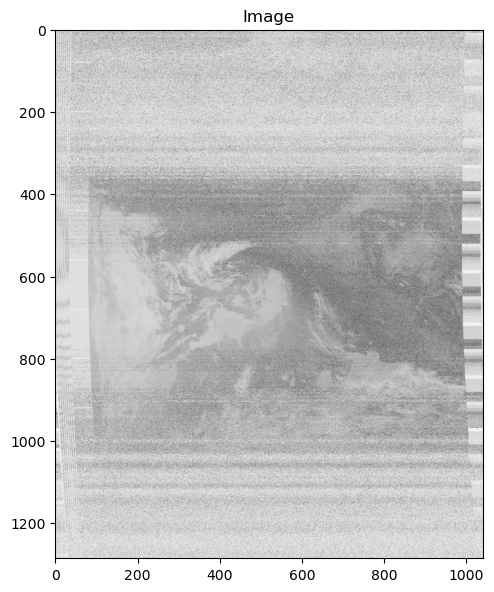

In [32]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix2[:-1, 1040:2080], cmap='gray')
plt.title('Image')
plt.show()